# 📊 Economical Analysis  

## Steps to Analyze Data 🛠️  

1. 🔍 **Retrieve Data**:  
   Use the **Fred object** to fetch the data needed for analysis.  

2. 🧹 **Clean and Reformat Data**:  
   Organize and prepare the data for further steps by cleaning up inconsistencies.  

3. 📈 **Graph Data for Visualization**:  
   Plot all relevant data to create clear and insightful visualizations.  

4. 👩‍💼 **Analyze Employment Rates**:  
   - Observe how the **employment rate** changed across all states 📉📈 from **2020 to 2024**.  

5. 👥 **Study Participation Rates**:  
   - Examine the **participation rate trends** for all states during the same period.  


## 🎯 Goals:  
- Provide actionable insights into employment and participation trends.  
- Identify significant changes or patterns over the years.  

---


## 🛠️ Setting up

> ⚠️ **Notice**: Please go to Settings to fill in your Fred API KEY <br>
>                For more information, please visit https://fred.stlouisfed.org/docs/api/api_key.html

Please Create a .env file from root directory and past the following code: <br>
```fred_key='INPUT YOUR API KEY HERE!'```


In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from fredapi import Fred
import plotly.express as px

from dotenv import load_dotenv
import os

In [25]:

load_dotenv()
fred_key = os.getenv('fred_key')

plt.style.use('fivethirtyeight')
pd.set_option('display.max_columns', 500)
color_pal=plt.rcParams['axes.prop_cycle'].by_key()['color']

In [26]:
fred = Fred(api_key = fred_key)

---

# 📉 Pulling Unemployment Rate

1. 🔍 **Use Fred object** to search for the data.
2. 🔄 **Reindex** the DataFrame by states.
3. 🧹 **Clean the data**: remove duplicates and null values.
4. 📊 **Graph** the data for analysis.



In [5]:
unempl_df = fred.search('unemployment rate state', filter=('frequency', 'Monthly'))
unempl_df = unempl_df.query('seasonal_adjustment == "Seasonally Adjusted" and units == "Percent"')
unempl_df = unempl_df.loc[unempl_df['title'].str.contains('Unemployment Rate')]

In [6]:
# Data Cleaning Process
all_res = []

for id in unempl_df.index:
    res = fred.get_series(id)
    res = res.to_frame(name=id)
    all_res.append(res)
    

In [18]:
unempl_res = pd.concat(all_res, axis=1)
id_to_state = unempl_df['title'].str.replace('Unemployment Rate in ', '').to_dict()

unempl_res.columns = [id_to_state[c] for c in unempl_res.columns]
unempl_states = unempl_res.loc[:, [col for col in unempl_res.columns.drop_duplicates() \
                                  if len(col) <= 15]]

unempl_states = unempl_states.dropna()
unempl_states = unempl_states.drop('Puerto Rico', axis=1)
unempl_states.head()

California  Texas  New York  Florida  Pennsylvania  Ohio  \
1976-01-01         9.2    5.8      10.3      9.7           8.0   8.1   
1976-02-01         9.2    5.8      10.3      9.7           8.1   8.1   
1976-03-01         9.1    5.9      10.2      9.6           8.1   8.1   
1976-04-01         9.1    5.9      10.2      9.5           8.1   8.0   
1976-05-01         9.0    5.9      10.1      9.3           8.1   7.8   

            Michigan  Alabama  Massachusetts  North Carolina  Illinois  \
1976-01-01       9.9      6.6           10.5             6.4       6.6   
1976-02-01       9.9      6.6           10.5             6.4       6.6   
1976-03-01       9.9      6.6           10.5             6.4       6.6   
1976-04-01       9.8      6.5           10.3             6.3       6.6   
1976-05-01       9.6      6.4           10.1             6.1       6.6   

            New Jersey  Georgia  Colorado  Arizona  Wisconsin  Virginia  \
1976-01-01        10.3      8.4       5.8     10.2        5.8       6.1   
1976-02-01        10.3      8.4       5.7     10.2        5.8       6.1   
1976-03-01        10.3      8.4       5.7     10.1        5.7       6.1   
1976-04-01        10.3      8.3       5.6     10.0        5.6       6.0   
1976-05-01        10.3      8.1       5.6      9.8        5.5       5.9   

            Kentucky  South Carolina  New Mexico  Minnesota  Tennessee  \
1976-01-01       5.6             7.4         8.6        6.0        6.0   
1976-02-01       5.6             7.4         8.7        6.0        6.0   
1976-03-01       5.6             7.3         8.7        5.9        6.0   
1976-04-01       5.6             7.2         8.6        5.8        6.0   
1976-05-01       5.5             7.0         8.6        5.7        5.9   

            Washington  Maryland  Oregon  West Virginia  Nevada  Arkansas  \
1976-01-01         8.5       6.4     9.5            7.5     9.2       7.3   
1976-02-01         8.5       6.4     9.5            7.5     9.2       7.3   
1976-03-01         8.4       6.4     9.4            7.5     9.2       7.3   
1976-04-01         8.5       6.4     9.2            7.5     9.0       7.2   
1976-05-01         8.5       6.5     9.1            7.4     8.9       7.1   

            Oklahoma  Missouri  Alaska  Iowa  Utah  Indiana  Louisiana  \
1976-01-01       5.8       5.9     7.1   4.3   5.8      6.6        6.3   
1976-02-01       5.8       5.9     7.1   4.3   5.9      6.6        6.3   
1976-03-01       5.8       5.9     7.0   4.3   5.8      6.5        6.3   
1976-04-01       5.8       6.0     6.9   4.2   5.8      6.3        6.4   
1976-05-01       5.7       6.0     6.9   4.1   5.7      6.0        6.5   

            Hawaii  North Dakota  Montana  Mississippi  Maine  Nebraska  \
1976-01-01     9.8           3.4      5.8          6.7    8.7       3.3   
1976-02-01     9.8           3.4      5.8          6.7    8.7       3.3   
1976-03-01     9.8           3.4      5.8          6.6    8.6       3.3   
1976-04-01     9.7           3.5      5.8          6.4    8.6       3.2   
1976-05-01     9.4           3.6      5.8          6.3    8.5       3.1   

            Connecticut  Idaho  New Hampshire  Rhode Island  Kansas  Wyoming  \
1976-01-01          9.8    5.6            6.5           7.8     4.2      4.1   
1976-02-01          9.8    5.6            6.5           7.8     4.2      4.1   
1976-03-01          9.8    5.6            6.5           7.7     4.2      4.1   
1976-04-01          9.6    5.6            6.5           7.7     4.2      4.0   
1976-05-01          9.4    5.6            6.5           7.7     4.2      3.9   

            Delaware  Vermont  South Dakota  
1976-01-01       8.0      8.6           3.3  
1976-02-01       8.0      8.6           3.3  
1976-03-01       8.0      8.6           3.2  
1976-04-01       8.1      8.6           3.1  
1976-05-01       8.3      8.5           3.1

In [8]:
px.line(unempl_states, title='Unemployment Rate by State')

<Axes: title={'center': 'Unemployment Rate 2024-09-01'}>

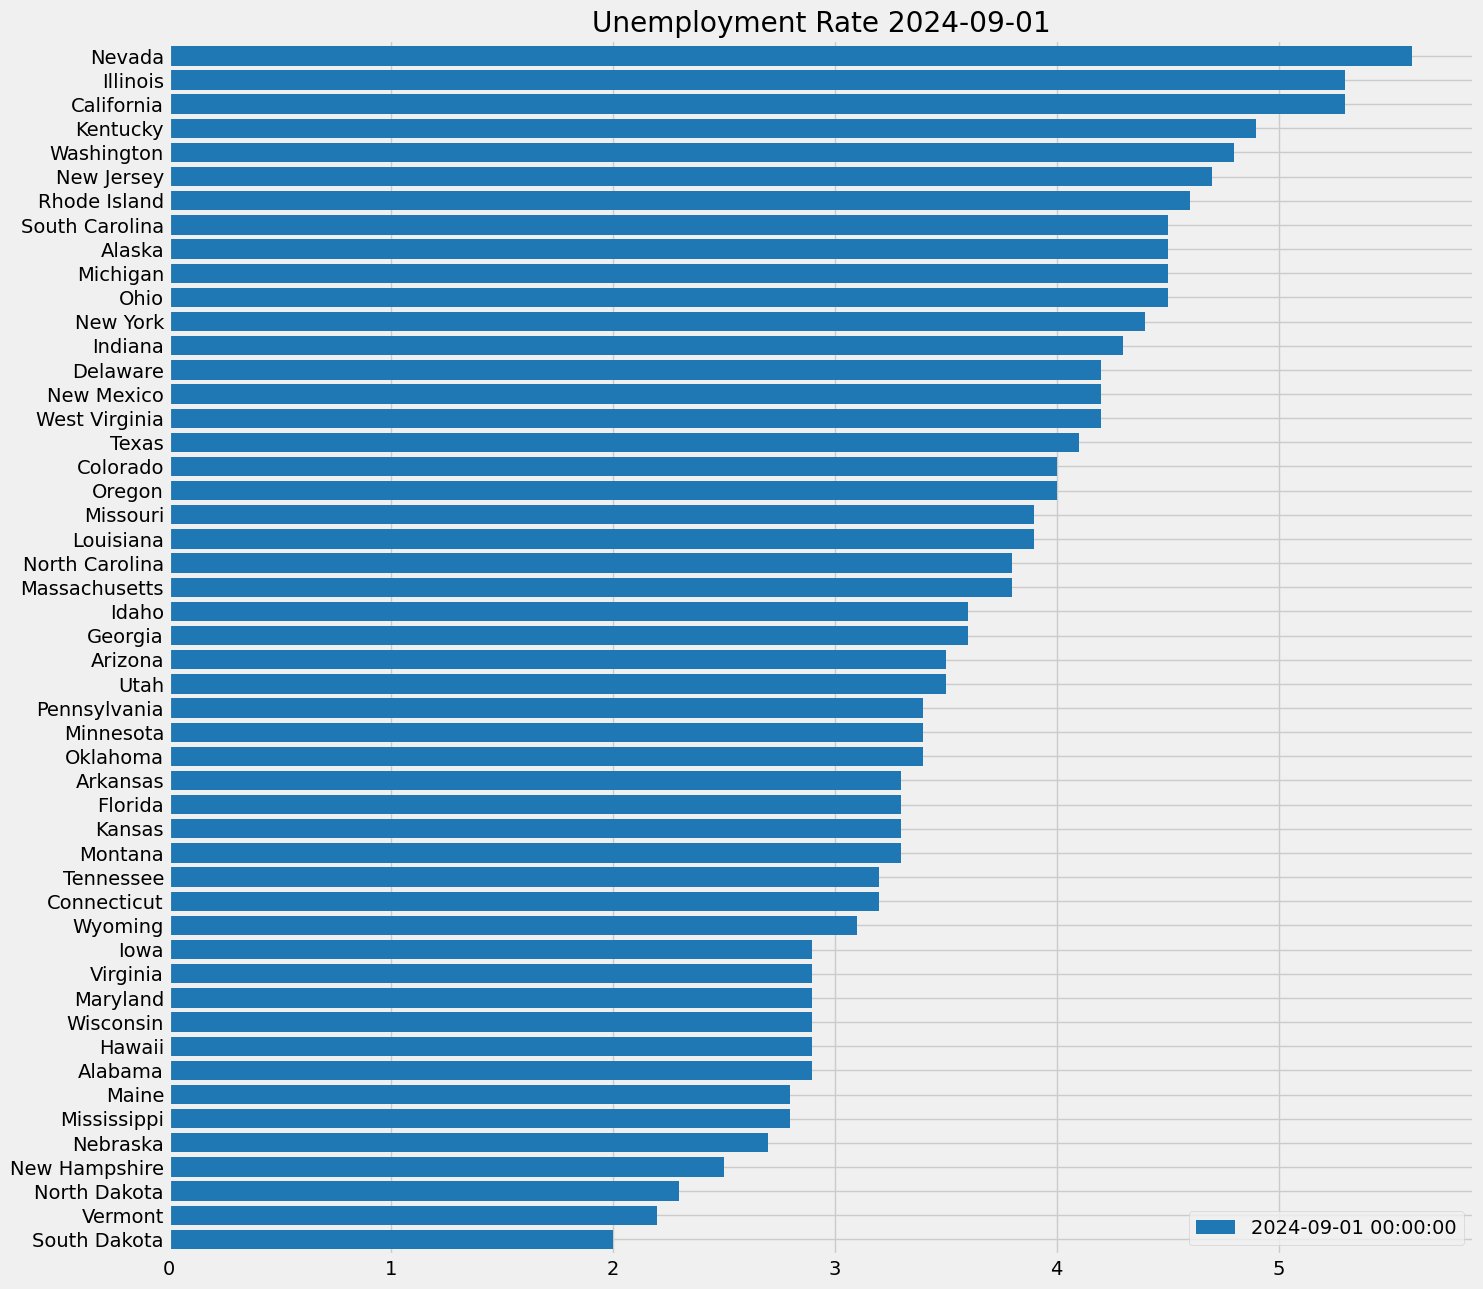

In [36]:
colors = ['#1f77b4', '#ff7f0e', '#2ca02c']
unempl_states.loc[unempl_states.index == '2024-09-01'].T \
    .sort_values('2024-09-01') \
    .plot(kind='barh', figsize=(15, 15), width=0.8, title='Unemployment Rate 2024-09-01', color=colors)

---

## 📊 Pull & Clean Participation Rate

- The following process follows the procedure above.


In [10]:
part_df = fred.search('participation rate state', filter=('frequency', 'Monthly'))
part_df = part_df.query('seasonal_adjustment == "Seasonally Adjusted" and units == "Percent"')

In [11]:
part_id_to_state = part_df['title'].str.replace('Labor Force Participation Rate for ', '').to_dict()

part_res = []

for id in part_df.index:
  res = fred.get_series(id)
  res = res.to_frame(name=id)
  part_res.append(res)
part_states = pd.concat(part_res, axis=1)

In [12]:
part_states.columns = [part_id_to_state[c] for c in part_states.columns]

In [27]:
part_states = part_states.loc[:, [col for col in part_states.columns if len(col) <= 15]]
part_states = part_states.dropna()
part_states.head()

California  Alabama  New York  Michigan  Mississippi  Texas  \
1976-01-01        62.6     57.0      58.0      61.6         58.8   63.8   
1976-02-01        62.4     56.9      58.0      61.5         58.6   63.5   
1976-03-01        62.2     56.8      58.0      61.5         58.5   63.4   
1976-04-01        62.2     56.8      58.0      61.6         58.5   63.5   
1976-05-01        62.3     56.8      58.1      61.7         58.5   63.6   

            Florida  Kentucky  Ohio  Wisconsin  Pennsylvania  Massachusetts  \
1976-01-01     55.8      60.5  61.7       65.6          58.4           64.8   
1976-02-01     55.7      60.3  61.7       65.5          58.3           64.7   
1976-03-01     55.5      60.2  61.7       65.4          58.3           64.6   
1976-04-01     55.5      60.1  61.6       65.4          58.3           64.6   
1976-05-01     55.4      60.1  61.6       65.5          58.3           64.6   

            Minnesota  Maryland  West Virginia  Tennessee  Maine  Illinois  \
1976-01-01       65.6      64.3           52.5       59.6   62.1      63.0   
1976-02-01       65.5      64.2           52.4       59.4   61.9      63.0   
1976-03-01       65.4      64.1           52.3       59.3   61.9      62.9   
1976-04-01       65.4      64.1           52.3       59.3   61.8      62.9   
1976-05-01       65.5      64.1           52.2       59.4   61.7      63.0   

            North Carolina  Georgia  Louisiana  South Carolina  Colorado  \
1976-01-01            66.5     63.7       56.8            65.3      67.2   
1976-02-01            66.3     63.6       56.6            65.2      67.0   
1976-03-01            66.2     63.5       56.5            65.0      66.8   
1976-04-01            66.2     63.5       56.4            64.9      66.6   
1976-05-01            66.3     63.6       56.4            64.7      66.5   

            Utah  Virginia  Indiana  Missouri  New Jersey  Iowa  Alaska  \
1976-01-01  62.8      65.9     64.0      60.5        61.5  64.4    69.0   
1976-02-01  62.6      65.8     63.9      60.3        61.4  64.3    68.4   
1976-03-01  62.5      65.6     63.8      60.3        61.4  64.2    67.8   
1976-04-01  62.5      65.5     63.8      60.4        61.5  64.1    67.9   
1976-05-01  62.6      65.4     63.9      60.6        61.6  64.1    67.9   

            Washington  Arizona  New Mexico  Idaho  Arkansas  Oklahoma  \
1976-01-01        60.9     59.5        60.8   63.0      57.9      59.3   
1976-02-01        60.7     59.2        60.5   62.8      57.8      59.2   
1976-03-01        60.6     59.1        60.3   62.7      57.7      59.1   
1976-04-01        60.6     59.1        60.3   62.7      57.7      59.0   
1976-05-01        60.7     59.1        60.3   62.8      57.7      59.0   

            Nebraska  Hawaii  Nevada  Montana  Oregon  New Hampshire  Vermont  \
1976-01-01      64.9    69.9    71.3     62.7    62.9           65.9     63.6   
1976-02-01      64.9    69.6    70.8     62.5    62.7           65.6     63.4   
1976-03-01      64.8    69.6    70.5     62.4    62.5           65.6     63.2   
1976-04-01      64.8    69.4    70.4     62.3    62.4           65.7     63.5   
1976-05-01      64.8    69.3    70.5     62.2    62.5           66.0     63.6   

            Connecticut  North Dakota  South Dakota  Kansas  Rhode Island  \
1976-01-01         64.2          62.6          64.6    65.1          63.8   
1976-02-01         64.1          62.4          64.4    65.0          63.7   
1976-03-01         64.0          62.3          64.4    64.9          63.6   
1976-04-01         64.1          62.5          64.3    65.0          63.7   
1976-05-01         64.3          62.6          64.3    65.1          63.6   

            Delaware  Wyoming  
1976-01-01      62.7     65.3  
1976-02-01      62.5     64.9  
1976-03-01      62.5     64.7  
1976-04-01      62.4     64.9  
1976-05-01      62.4     65.2

In [29]:
px.line(part_states, title='Participation Rate by State')

---

## 📊 Graphing the Unemployment Rate and Participation Rate

Graphing the **Unemployment Rate** and **Participation Rate** helps us identify trends and patterns in economic conditions.

1. 📉 **Unemployment Rate**
The **unemployment rate**: the percentage of people in the labor force who are actively seeking but unable to find work. <br>
It serves as a key indicator of economic health.

2. 📊 **Participation Rate**
The **participation rate**: the percentage of the working-age population that is either employed or actively looking for work. <br>
It shows how engaged people are in the labor market.



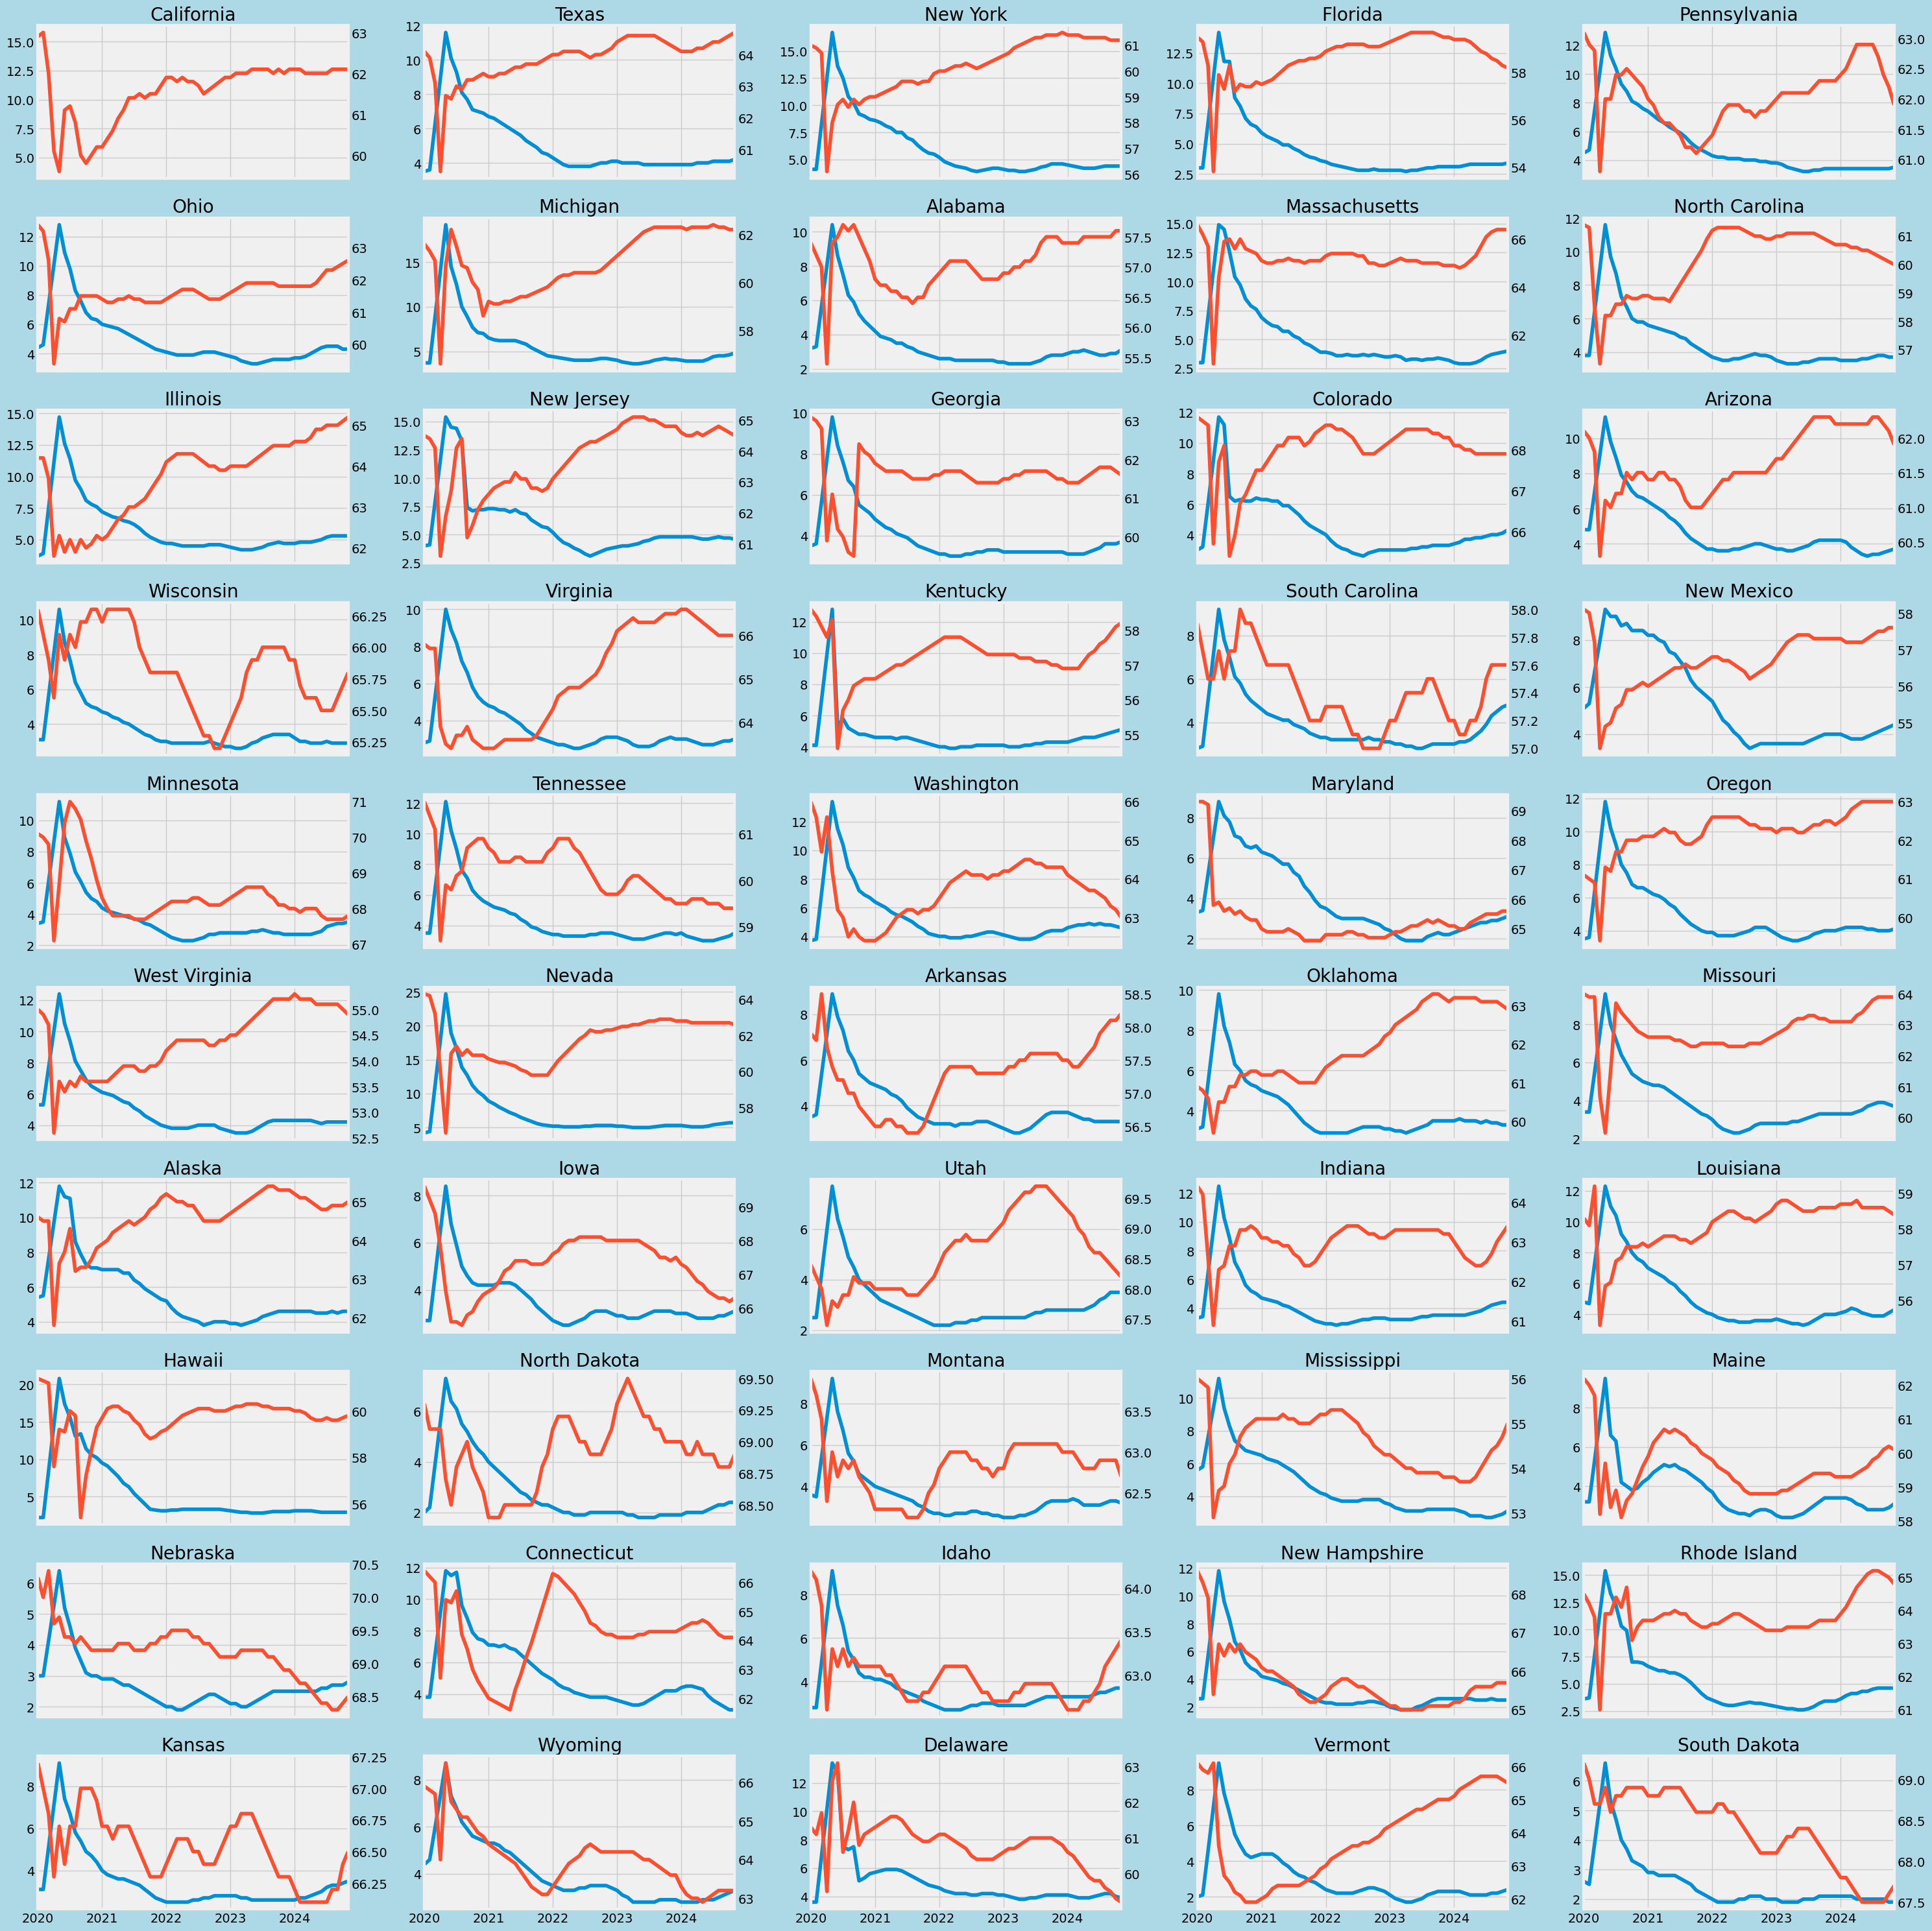

In [16]:
fig, axs = plt.subplots(10, 5, figsize = (30, 30), sharex=True)
axs = axs.flatten()
fig.patch.set_facecolor('lightblue')

i = 0
for state in unempl_states.columns:
  if state == 'District of Columbia':
    continue
  ax2 = axs[i].twinx()
  unempl_states.query('index >= 2020 and index < 2025')[state] \
    .plot(ax=axs[i], label='Unemployment')
  part_states.query('index >= 2020 and index < 2025')[state] \
    .plot(ax=ax2, label='Participation', color=color_pal[1])
  ax2.grid(False)
  axs[i].set_title(state)
  i += 1
plt.tight_layout()
plt.show()


From the analysis, we observe a huge **spike** in both the **unemployment rate** and **participation rate** between **2020 and 2021** across all states. This sharp increase was largely caused by the **COVID-19 pandemic**, which severely disrupted the economy. As a result, the United States faced a challenging economic period.

However, after **2021**, there was a notable **decline** in the **unemployment rate** across every state, indicating a recovery in the job market. In contrast, the **participation rate** did not experience the same decline, suggesting that while more people found jobs, many remained disengaged from the workforce. 

The change in the dataset aligns with the **end of the COVID-19 pandemic** in **2022**, signaling a period of economic stabilization but also shows ongoing challenges in workforce participation.

## **Thank you for reading!** 😊
